In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from numpy import where

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def predict(x_min,x_max,y_max,y_min,df):
  data = {'status': [], 'elapased_time': []}
  df_new = pd.DataFrame(data)

  status=-1
  c=0
  k=0

  for index, row in df.iterrows():
    if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
      if status==0:
        df_new=df_new.append({'status':0,'elapased_time':c},ignore_index=True)
        c=0
      status= 1
      c=c+1
    else:
      if status==1:
        df_new=df_new.append({'status':1,'elapased_time':c},ignore_index=True)
        c=0
      status= 0
      c=c+1
  df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
  new_dtypes = {"status": int, "elapased_time": int}
  df_new = df_new.astype(new_dtypes)

  svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.1)

  svm.fit(df_new)
  pred = svm.predict(df_new)

  anom_index = where(pred==-1)
  df_new = df_new.reset_index(drop=True) 
  values = df_new.loc[anom_index]
  df_new['svm_p']=pred
  # print(values.shape[0])
  sum_0=df_new.loc[df_new['status'] == 0, 'elapased_time'].sum()
  sum_1=df_new.loc[df_new['status'] == 1, 'elapased_time'].sum()
  result='non-cheat'

  if (df_new.shape[0]<20 and sum_0 > 2700): # no much frequencies 2700 s 90% of 3000
    result = 'non cheat'
  elif df_new.shape[0]<20 and sum_1 > 2700:
    result = 'cheat'  
  else:
      for index, row in df_new.iterrows():
        if (row['svm_p']==-1 and row['status']==0):
          if k>15:
            print(k)
            result='cheat'
            break
          k=0
        else:
          k=k+1
  
  print(result)

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_cheat1.csv',names=["X", "Y"])
predict(-6, 1505, 839, 27,df)

29
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_cheat.csv',names=["X", "Y"])
predict(-26 ,1332,822,23,df)

25
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_normal.csv',names=["X", "Y"])
predict(49, 1399, 817 ,65,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_normal1.csv',names=["X", "Y"])
predict(49, 1399, 817 ,65 ,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_good.csv',names=["X", "Y"])
predict( -26.0,1332,822, 23,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/test_cheat.csv',names=["X", "Y"])
print(df.shape)
predict( -57,1677,923,24,df)

(3000, 2)
29
cheat


In [ ]:
df.values.astype(str).tolist()

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/gazeData (18).csv',names=["X", "Y"])
print(df.shape)
predict( 80,1446,841,76,df)


(2000, 2)
non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/gazeData (19).csv',names=["X", "Y"])
print(df.shape)
predict( -44,1428,877,39,df)


(3000, 2)
19
cheat


In [ ]:
# -6,1505,839,27
# -75,1515,805,-23 - normal1 1

#cheat1
# -6, 1505, 839, 27   - 7

#normal
# x_min,x_max,y_max,y_min = 49, 1399, 817 ,65    --> 3

#normal1
# -75, 1515, 805, -23

# cheat 
#  -26 ,1332,822,23

## Non - Cheat Evaluation - git test
corner gazes = 61,1597,839,52

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/non-cheat/gazeData (1).csv',names=["X", "Y"])
predict(61,1597,839,52,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/non-cheat/gazeData (2).csv',names=["X", "Y"])
predict(61,1597,839,52,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/non-cheat/gazeData (3).csv',names=["X", "Y"])
predict(61,1597,839,52,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/non-cheat/gazeData (4).csv',names=["X", "Y"])
predict(61,1597,839,52,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/non-cheat/gazeData (5).csv',names=["X", "Y"])
predict(61,1597,839,52,df)

non cheat


#Cheat Evaluation - ml test
-1,1497,881,46

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat/gazeData.csv',names=["X", "Y"])
predict(-1,1497,881,46,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat/gazeData (1).csv',names=["X", "Y"])
predict(-1,1497,881,46,df)

17
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat/gazeData (2).csv',names=["X", "Y"])
predict(-1,1497,881,46,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat/gazeData (3).csv',names=["X", "Y"])
predict(-1,1497,881,46,df)

51
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat/gazeData (4).csv',names=["X", "Y"])
predict(-1,1497,881,46,df)

16
cheat


# Cheat Evaluation 2 - 1,0,1,1 - excel test
66,1453,900,31

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 2/gazeData (5).csv',names=["X", "Y"])
predict(66,1453,900,31,df)

19
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 2/gazeData (6).csv',names=["X", "Y"])
predict(66,1453,900,31,df)

17
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 2/gazeData (7).csv',names=["X", "Y"])
predict(66,1453,900,31,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 2/gazeData (8).csv',names=["X", "Y"])
predict(66,1453,900,31,df)

17
cheat


# Cheat - 3 - word test
31,1493,838,15
- not cheat, little cheat at end, cheat, no cheat, cheat

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 3/gazeData (5).csv',names=["X", "Y"])
predict(31,1493,838,15,df)

17
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 3/gazeData (6).csv',names=["X", "Y"])
predict(31,1493,838,15,df)

22
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 3/gazeData (7).csv',names=["X", "Y"])
predict(31,1493,838,15,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 3/gazeData (8).csv',names=["X", "Y"])
predict(31,1493,838,15,df)

non cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 3/gazeData (9).csv',names=["X", "Y"])
predict(31,1493,838,15,df)

33
cheat


# Cheat 4 -  ppt quiz
non cheat 3 min and , cheat until end
-49,1465,829,29

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 4/gazeData (1).csv',names=["X", "Y"])
predict(-49,1465,829,29,df)

non-cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 4/gazeData (2).csv',names=["X", "Y"])
predict(-49,1465,829,29,df)

29
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/cheat 4/gazeData (3).csv',names=["X", "Y"])
predict(-49,1465,829,29,df)

25
cheat


Madushanka

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/Madushanka/gazeData.csv',names=["X", "Y"])
#68, 1323,533, 39
df=df[:-9]
predict(68, 1323,533, 39,df)

non-cheat


In [ ]:
df.shape

(453, 2)

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/Madushanka/gazeData (1).csv',names=["X", "Y"])
df=df[:-9]
predict(68,1323,553,39,df)

17
cheat


In [ ]:
df.shape

(1106, 2)

In [ ]:
#68,1323,553,39

Sandali

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/sandali/gazeData.csv',names=["X", "Y"])
df=df[:-5]
df= df.iloc[:4000]
predict(87, 1451,787, 40,df)

19
cheat


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/sandali/gazeData (1).csv',names=["X", "Y"])
# df.tail(10)
df=df[:-5]
predict(-257,1580,680,78,df)

112
cheat


Some analysis

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_cheat.csv',names=["X", "Y"])
df=df[:-1000]
df.tail()

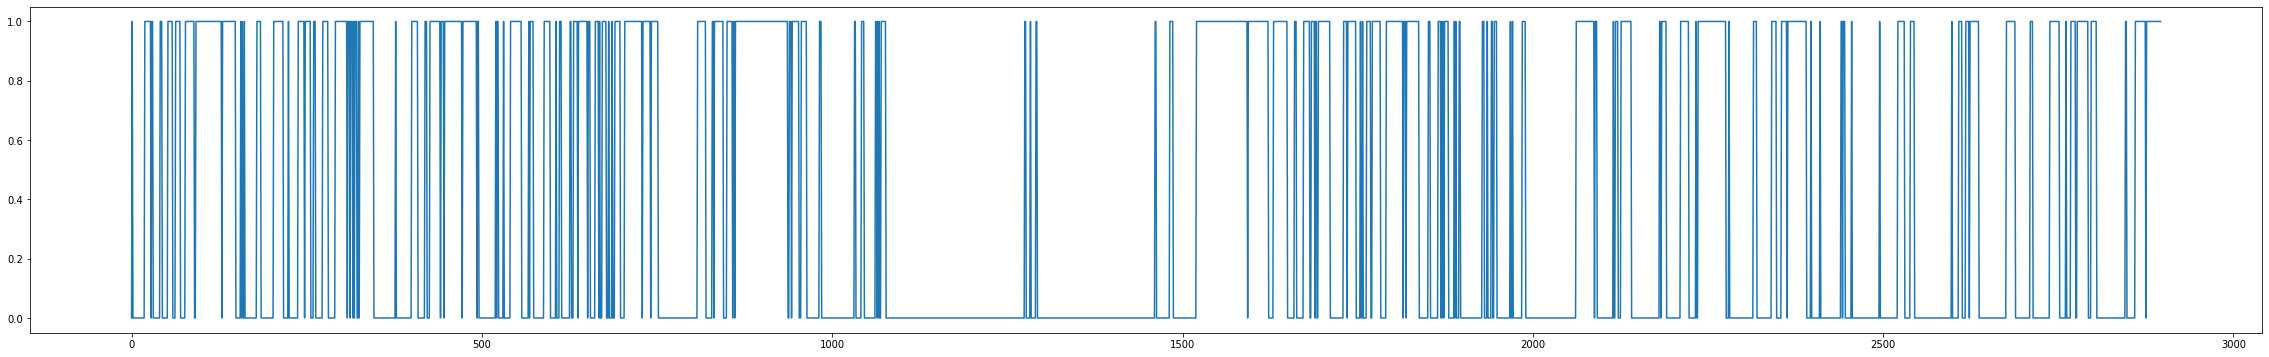

In [ ]:
x_min ,x_max , y_max , y_min = -257,1580,680,78
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    df.loc[index,'status']= 1
  else:
    df.loc[index,'status']= 0
# df= df.iloc[:1000]

plt.figure(figsize=(40, 6))
plt.plot(df.index,df['status'])

In [ ]:
data = {'status': [], 'elapased_time': []}
df_new = pd.DataFrame(data)
c=0
status = 0
for index, row in df.iterrows():
  if (df.iloc[index,2] == status):
    c=c+1
  else:
    # print(status,c)
    df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
    c=1
    status=df.iloc[index,2]
df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
new_dtypes = {"status": int, "elapased_time": int}
df_new = df_new.astype(new_dtypes)

# df_new['result']=1
# df_new.loc[18,'result']=0
# df_new.loc[36,'result']=0
# df_new.loc[60,'result']=0
df_new.head()

,status,elapased_time
0,0,1
1,1,1
2,0,17
3,1,9
4,0,1


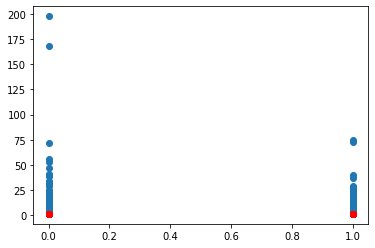

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='linear',nu=0.1)
# {'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.1}
# {'kernel': 'linear', 'nu': 0.1}
svm.fit(df_new)
pred = svm.predict(df_new)

from numpy import where

anom_index = where(pred==-1)
values = df_new.loc[anom_index]

plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')

plt.show()

In [ ]:
values.shape

(78, 2)

In [ ]:
df_new['svm_p']=pred
df_new['cum_sum'] = df_new['elapased_time'].cumsum(axis = 0)
df_new.head()

,status,elapased_time,svm_p,cum_sum
0,0,1,-1,1
1,1,1,-1,2
2,0,17,1,19
3,1,9,1,28
4,0,1,-1,29


In [ ]:
for index, row in df_new.iterrows():
  if row['svm_p'] == -1:
    df_new.loc[index,'status']= df_new.loc[index+1,'status']

In [ ]:
df_new.head()

,status,elapased_time,svm_p,cum_sum
0,1,1,-1,1
1,0,1,-1,2
2,0,17,1,19
3,1,9,1,28
4,1,1,-1,29


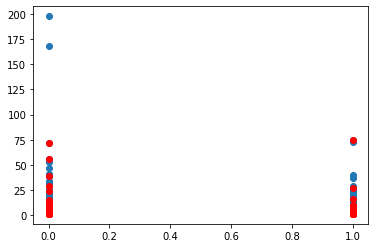

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf',nu=0.001,gamma=1e-05)
# {'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.1}
# {'kernel': 'linear', 'nu': 0.1}
# 'gamma': 1e-05, 'kernel': 'rbf', 'nu': 0.001 ****
svm.fit(df_new)
pred = svm.predict(df_new)

from numpy import where

anom_index = where(pred==-1)
values = df_new.loc[anom_index]

plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')

plt.show()

In [ ]:
df_new['svm_p']=pred
df_new['cum_sum'] = df_new['elapased_time'].cumsum(axis = 0)
df_new.head()

,status,elapased_time,svm_p,cum_sum
0,1,1,-1,1
1,0,1,-1,2
2,0,17,1,19
3,1,9,1,28
4,1,1,1,29
